In [18]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




    RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
    CustomerId — идентификатор клиента
    Surname — фамилия клиента
    CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
    Geography — страна клиента (банк международный)
    Gender — пол клиента
    Age — возраст клиента

    Tenure — сколько лет клиент пользуется услугами банка
    Balance — баланс на счетах клиента в банке
    NumOfProducts — количество услуг банка, которые приобрёл клиент
    HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
    IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
    EstimatedSalary — предполагаемая заработная плата клиента
    Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)



In [19]:
churn_data.drop(['RowNumber'], axis=1, inplace=True)

In [20]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [21]:
churn_data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [22]:
cols_to_category = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'] 
for col in churn_data.columns: 
    if col in cols_to_category: 
        churn_data[col] = churn_data[col].astype('category')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(4), object(1)
memory usage: 606.4+ KB


In [23]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [24]:
churn_data.describe(include=['category', 'object'])

,Surname,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000
unique,2932,3,2,4,2,2,2
top,Smith,France,Male,1,1,1,0
freq,32,5014,5457,5084,7055,5151,7963


In [25]:
ratio_Exited = churn_data['Exited'].value_counts()
ratio_Exited

0    7963
1    2037
Name: Exited, dtype: int64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
plt.style.use('default')

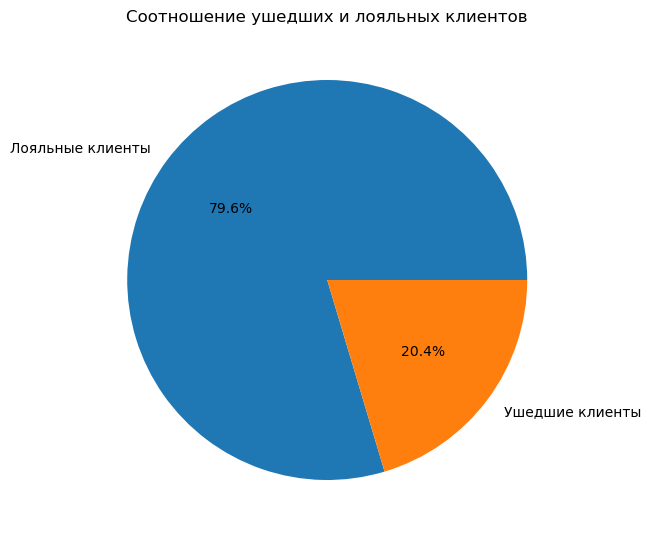

In [28]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio_Exited,
    labels=['Лояльные клиенты','Ушедшие клиенты'],
    autopct='%.1f%%')
axes.set_title('Соотношение ушедших и лояльных клиентов');


Вывод: 1/5 клииентов ушли

In [29]:
balanse_df=churn_data[churn_data['Balance'] > 2500]
balanse_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


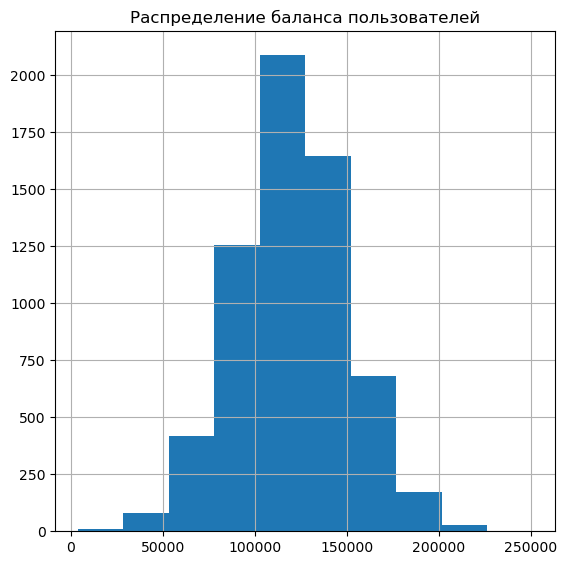

In [30]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(balanse_df['Balance'],
          bins=10)
axes.grid() 
axes.set_title('Распределение баланса пользователей');


Распределение баланса пользователей похоже на Нормальное распределение. У более 2000 потребителей баланс в пределах от 100000 до 125000

In [44]:
Exited_0 = churn_data[churn_data['Exited'] == 0]['Balance']
Exited_0.describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [45]:
Exited_1 = churn_data[churn_data['Exited'] == 1]['Balance']
Exited_1.describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

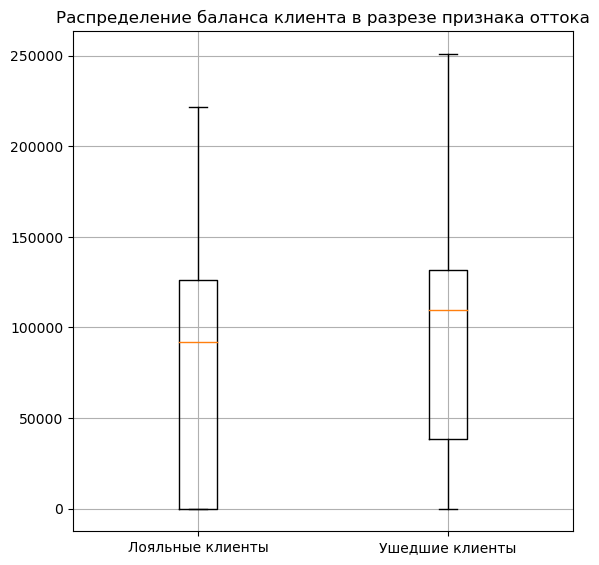

In [46]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot([Exited_0, Exited_1],
             labels=['Лояльные клиенты','Ушедшие клиенты'])
axes.grid() 
axes.set_title('Распределение баланса клиента в разрезе признака оттока');


Ушедшие клиенты имеют в среднем больше денежных средств на счету. Возможно это связано состоимостью обслуживания счета. 

In [47]:
age_0 = churn_data[churn_data['Exited'] == 0]['Age']
age_0.describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

In [48]:
age_1 = churn_data[churn_data['Exited'] == 1]['Age']
age_1.describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

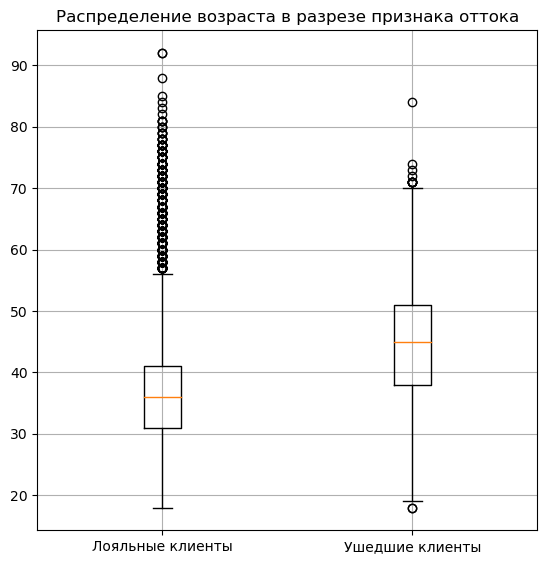

In [50]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot([age_0, age_1],
             labels=['Лояльные клиенты','Ушедшие клиенты'])
axes.grid() 
axes.set_title('Распределение возраста в разрезе признака оттока');

Лояльные клиенты имеют меньший возраст. У лояльных клиентов больше потенциальных выбросов. Банку стоит обратить внимание на клиентов в возрасте от 40 до 50 лет.
